In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import math
import torch
from torchdiffeq import odeint_adjoint
from torch.utils.data import Dataset, DataLoader
import scipy
from sklearn.preprocessing import RobustScaler, StandardScaler

In [2]:
current_directory = pathlib.Path("__file__").parent
FILE_NAME = "Final Database.csv"
data_path = current_directory / "data" 
data_path_2 = data_path / "Battery_RUL.csv"
HNEI_data_path = data_path / 'HNEI Dataset' / FILE_NAME
NASA_data_path = data_path / "NASA Dataset" / 'B0026.mat'

In [3]:
df = pd.read_csv(data_path_2)
#df = df.drop('Unnamed: 0', axis=1)
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [193]:
df2 = pd.read_csv(data_path / "Battery Heating Dataset" / "TripA02.csv", encoding='unicode_escape', sep=';')
df2

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,96.89,589.0,45.50,14.00,0.09,0.0,381.80,-37.60,23.0,...,1.04,1,0,0,32.0,0,0,0,5.0,22.84
1,0.1,96.87,589.0,45.61,15.00,0.11,0.0,381.80,-37.62,23.0,...,1.04,1,0,0,32.0,0,0,0,5.0,22.84
2,0.2,96.81,589.0,45.50,15.32,0.09,0.0,381.80,-37.67,23.0,...,1.04,1,0,0,32.0,0,0,0,5.0,22.84
3,0.3,96.74,589.0,45.50,15.18,-0.01,0.0,381.82,-37.65,23.0,...,1.04,1,0,0,32.0,0,0,0,5.0,22.84
4,0.4,96.72,589.0,45.50,15.50,0.01,0.0,381.87,-37.50,23.0,...,1.04,1,0,0,32.0,0,0,0,5.0,22.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,1412.5,46.18,560.0,34.77,4.38,0.42,0.0,382.50,8.50,26.0,...,0.32,1,0,0,30.5,0,0,0,11.5,23.34
14126,1412.6,46.16,560.0,34.40,5.50,-0.22,0.0,382.50,8.40,26.0,...,0.32,1,0,0,30.5,0,0,0,11.5,23.34
14127,1412.7,46.13,560.0,34.65,4.50,-0.02,0.0,382.50,8.29,26.0,...,0.32,1,0,0,30.5,0,0,0,11.5,23.34
14128,1412.8,46.15,560.0,34.54,4.69,0.07,0.0,382.50,8.14,26.0,...,0.32,1,0,0,30.5,0,0,0,11.5,23.34


In [ ]:
df['time (hr)'] = df['Discharge Time (s)'] / (60*24)


In [31]:
df2 = pd.read_csv('.\data\CS2 Dataset\CS2_8\CS2_8_1_28_10.txt', sep='\t')
df2['Capacity']

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shubham Mate\AppData\Local\Temp\ipykernel_1512\1650664756.py:1: SyntaxWarning: invalid escape sequence '\d'
  df2 = pd.read_csv('.\data\CS2 Dataset\CS2_8\CS2_8_1_28_10.txt', sep='\t')


0        0
1        0
2        0
3        0
4        0
        ..
2961    97
2962    97
2963    97
2964    97
2965    97
Name: Capacity, Length: 2966, dtype: int64

In [30]:
df2.describe()

,Time,Status code,Status category,Status color,Pgm code,Pgm step,Pgm para,Pgm cycle,mV,mA,...,Digital input 2,Digital input 3,Digital input 4,Digital output 1,Digital output 2,Digital output 3,Digital output 4,Analog output 1,Analog output 2,Unnamed: 29
count,2966.000000,2966.0,2966.000000,2966.0,2966.0,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,...,2966.0,2966.0,2966.0,2966.0,2966.0,2966.0,2966.0,2966.0,2966.0,0.0
mean,1469.742141,8.0,4.141942,3.0,0.0,1.368510,3.930546,1.631490,3905.712070,18.205327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
std,848.383684,0.0,1.565354,0.0,0.0,0.482482,2.835554,0.482482,359.777516,457.822979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000,8.0,3.000000,3.0,0.0,1.000000,2.000000,1.000000,2703.000000,-553.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
25%,735.308642,8.0,3.000000,3.0,0.0,1.000000,2.000000,1.000000,3535.000000,-549.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
50%,1469.615758,8.0,3.000000,3.0,0.0,1.000000,2.000000,2.000000,4137.000000,128.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75%,2204.925480,8.0,6.000000,3.0,0.0,2.000000,7.000000,2.000000,4204.000000,493.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
max,2938.230717,8.0,15.000000,3.0,0.0,2.000000,31.000000,2.000000,4205.000000,553.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [27]:
df2['Capacity'].describe()

count    17806.000000
mean        64.510895
std         25.515966
min          0.000000
25%         50.000000
50%         80.000000
75%         81.000000
max         84.000000
Name: Capacity, dtype: float64

In [21]:
df2.columns

Index(['Time', 'Status code', 'Status category', 'Status color', 'Pgm code',
       'Pgm step', 'Pgm para', 'Pgm cycle', 'mV', 'mA', 'Temperature',
       'Duration', 'Charge count', 'Discharge count', 'Capacity',
       'Analog input 1', 'Analog input 2', 'Analog input 3', 'Analog input 4',
       'Digital input 1', 'Digital input 2', 'Digital input 3',
       'Digital input 4', 'Digital output 1', 'Digital output 2',
       'Digital output 3', 'Digital output 4', 'Analog output 1',
       'Analog output 2', 'Unnamed: 29'],
      dtype='object')

In [25]:
print(df2[df2['Pgm cycle'] == 1]['Capacity'].describe())

count    1352.000000
mean       49.280325
std        29.275899
min         0.000000
25%        24.000000
50%        49.000000
75%        75.000000
max       101.000000
Name: Capacity, dtype: float64


In [4]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


### No Null Values

In [6]:
df['Total time (s)'].value_counts()

KeyError: 'Total time (s)'

In [21]:
df_filtered = df.drop_duplicates(subset='Total time (s)', keep='first')
df_filtered['Total time (s)'].value_counts()

Total time (s)
677688.50    1
7557.19      1
7565.50      1
7606.44      1
7604.50      1
            ..
9479.42      1
104171.80    1
18923.65     1
19029.51     1
19124.28     1
Name: count, Length: 14737, dtype: int64

The Dataset is made up of data from 14 different batteries.
We will split up this whole dataset into 14 dataframes, one for each battery.


In [7]:
# Since the cycle index of each battery starts at 1, we'll find rows where cycle index = 1
df[df["Cycle_Index"] == 1]

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.4885,3.670,3.211,5460.001,6755.01,10777.82,1112
1076,1.0,2604.00,1186.4955,3.666,3.213,5424.991,6706.02,10772.99,1107
2155,1.0,2562.02,1140.9910,3.666,3.219,5452.993,6740.99,10836.00,1107
3232,1.0,2566.08,1161.9830,3.667,3.214,5452.992,6740.99,10938.33,1107
4313,1.0,2590.02,1239.0070,3.660,3.225,5376.000,6678.01,10821.98,1133
5390,1.0,2609.47,1372.0000,3.650,3.228,5348.000,6678.02,11078.56,1102
6468,1.0,2590.98,1154.9760,3.667,3.224,5452.992,6727.01,10819.42,1107
7549,1.0,2590.50,1169.0240,3.667,3.206,5446.016,6734.02,10759.26,1104
8629,1.0,2565.31,1186.4965,3.664,3.221,5439.007,6740.99,10999.07,1107
9708,1.0,2587.94,1231.9990,3.661,3.223,5383.009,6678.02,10856.83,1107


In [8]:
def split_dataset(df):
    indices = df[df["Cycle_Index"] == 1].index.to_list()
    split_dfs = []
    for i in range(len(indices)-1):
        df_sliced = df.iloc[indices[i]:indices[i+1], :].copy()
        split_dfs.append(df_sliced)
    final_sliced_df = df.iloc[indices[-1]:, :].copy()
    split_dfs.append(final_sliced_df)
    return split_dfs

In [9]:
split_dfs = split_dataset(df)
split_dfs[13]

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
14013,1.0,2590.02,1189.984000,3.664,3.226,5404.001,6706.02,10909.09,1111
14014,2.0,7356.99,1232.000000,4.240,3.239,5446.016,6699.01,10598.02,1110
14015,3.0,7329.02,1152.651333,4.243,3.243,5432.000,6684.99,10479.01,1109
14016,4.0,7322.01,1127.007000,4.244,3.241,5439.004,6692.00,10395.00,1108
14017,6.0,64837.43,1127.008000,4.288,3.246,5432.000,107572.09,107572.09,1106
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [9]:
split_dfs[13]['Cycle_Index'] + split_dfs[13]['RUL']

14013    1112.0
14014    1112.0
14015    1112.0
14016    1112.0
14017    1112.0
          ...  
15059    1112.0
15060    1112.0
15061    1112.0
15062    1112.0
15063    1112.0
Length: 1051, dtype: float64

In [15]:
split_dfs[13].index = range(len(split_dfs[13].iloc[:, -1]))
split_dfs[13]

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2590.02,1189.984000,3.664,3.226,5404.001,6706.02,10909.09,1111
1,2.0,7356.99,1232.000000,4.240,3.239,5446.016,6699.01,10598.02,1110
2,3.0,7329.02,1152.651333,4.243,3.243,5432.000,6684.99,10479.01,1109
3,4.0,7322.01,1127.007000,4.244,3.241,5439.004,6692.00,10395.00,1108
4,6.0,64837.43,1127.008000,4.288,3.246,5432.000,107572.09,107572.09,1106
...,...,...,...,...,...,...,...,...,...
1046,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
1047,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
1048,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
1049,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [104]:
x_scaler = RobustScaler()
y_scaler = StandardScaler()
scaled_x = x_scaler.fit_transform(split_dfs[13].iloc[:, 1:-1])
scaled_y = y_scaler.fit_transform(pd.DataFrame(split_dfs[13].iloc[:, -1]))
scaled_x.shape, scaled_y.shape

((1051, 7), (1051, 1))

In [129]:
scaled_x = np.concat([pd.DataFrame(split_dfs[13].iloc[:, 0]), scaled_x], axis=-1)

In [130]:
def create_sliding_window(data, labels, window_size, step_size=1):
    """
    Create sliding window subsequences from the data.
    Args:
    - data: Numpy array of shape (num_timesteps, num_features)
    - labels: Numpy array of shape (num_timesteps,), corresponding RUL values
    - window_size: Number of time steps in each window
    - step_size: Step size for the sliding window (controls overlap)
    Returns:
    - X_windows: List of feature windows
    - y_windows: Corresponding RUL target for each window (RUL at the last time step)
    """
    X_windows = []
    y_windows = []

    for i in range(0, len(data) - window_size + 1, step_size):
        X_windows.append(data[i:i + window_size])
        y_windows.append(labels[i + window_size - 1])  # Target is the RUL at the end of the window

    return np.array(X_windows), np.array(y_windows)

In [131]:
window_size = 20
x_window, y_window = create_sliding_window(scaled_x, scaled_y, window_size)
x_window.shape, y_window.shape

((1032, 20, 8), (1032, 1))

In [135]:
class SlidingWindowDataset(Dataset):
    def __init__(self, X_windows, y_windows):
        self.X_windows = torch.tensor(X_windows, dtype=torch.float32)
        self.y_windows = torch.tensor(y_windows, dtype=torch.float32)

    def __len__(self):
        return len(self.X_windows)

    def __getitem__(self, idx):
        return self.X_windows[idx], self.y_windows[idx]

# Create dataset and dataloader
dataset = SlidingWindowDataset(x_window, y_window)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [136]:
for x, y in dataloader:
    print(x.shape, y.shape)
    break

torch.Size([32, 20, 8]) torch.Size([32, 1])


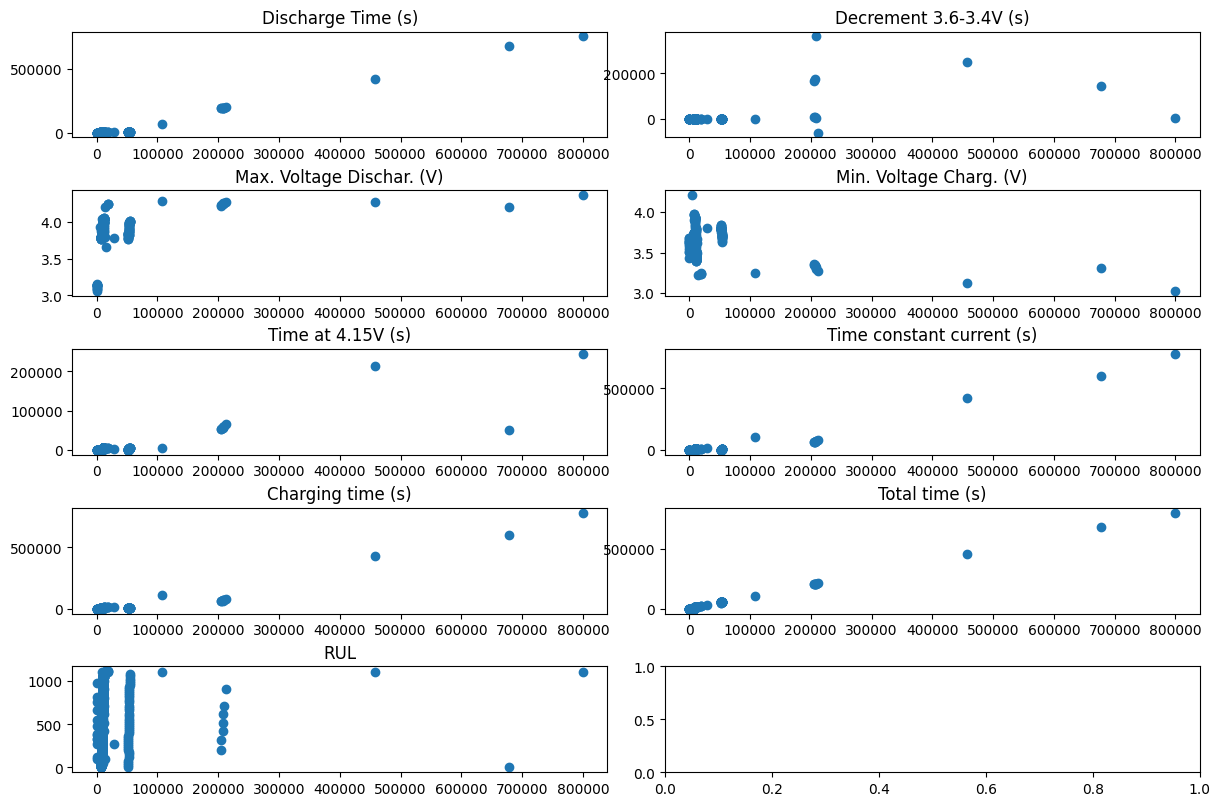

In [11]:
# Plot of all the features vs the cycle index (How the features change with time)
plot_nums = len(df.columns) - 1

fig, ax = plt.subplots(ncols=2, nrows=math.ceil(plot_nums/2), figsize=(12, 8))
fig.tight_layout()

for i in range(plot_nums):
    #print(int(plot_nums/2), int(i/2), i%2)
    ax[int(i/2), i%2].scatter(experimental_df["Total time (s)"], experimental_df[df.columns[i+1]])
    ax[int(i/2), i%2].set_title(df.columns[i+1])

plt.subplots_adjust(hspace=0.5)
plt.show()

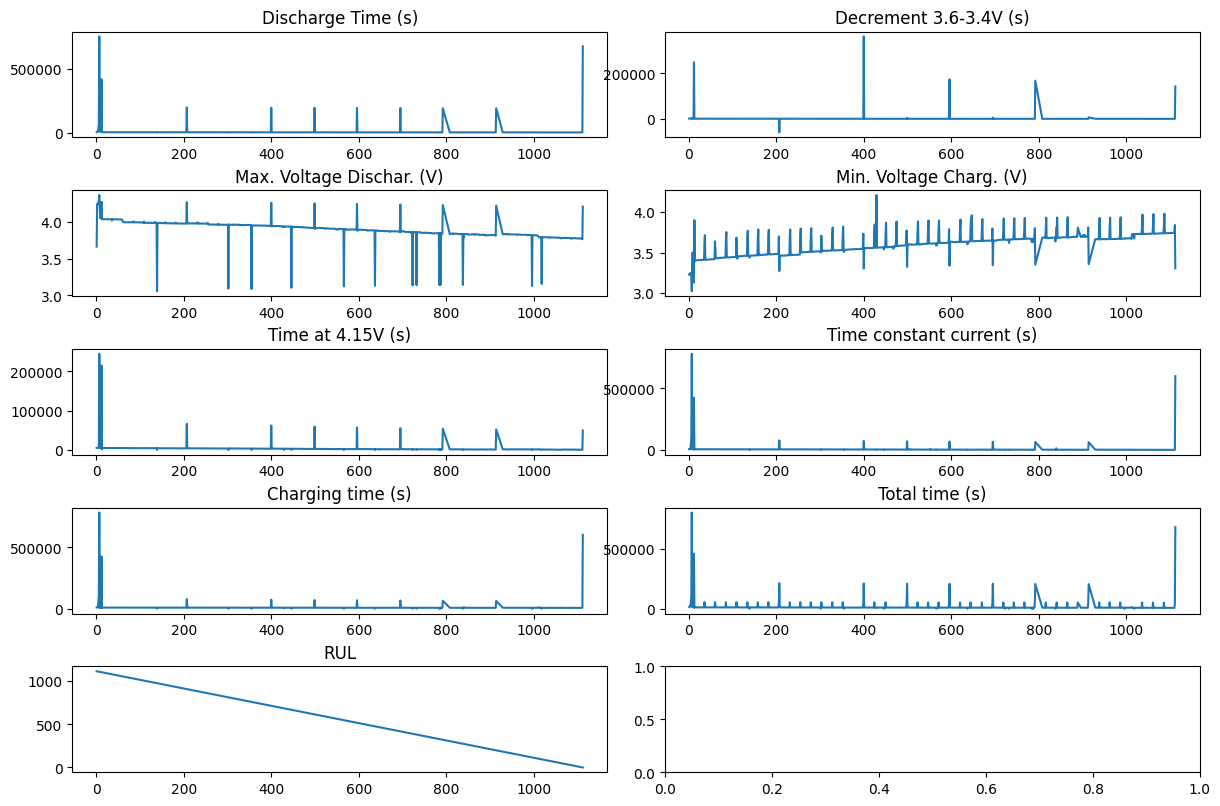

In [26]:
# Plot of all the features vs the cycle index (How the features change with time)
plot_nums = len(df.columns) - 1

fig, ax = plt.subplots(ncols=2, nrows=math.ceil(plot_nums/2), figsize=(12, 8))
fig.tight_layout()

for i in range(plot_nums):
    #print(int(plot_nums/2), int(i/2), i%2)
    ax[int(i/2), i%2].plot(experimental_df["Cycle_Index"], experimental_df[df.columns[i+1]])
    ax[int(i/2), i%2].set_title(df.columns[i+1])

plt.subplots_adjust(hspace=0.5)
plt.show()

In [12]:
experimental_df.corr()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),Total time (s),RUL
Cycle_Index,1.000000,-0.032070,-0.017605,-0.624707,0.786138,-0.167403,-0.072038,-0.050477,-0.047884,-1.000000
Discharge Time (s),-0.032070,1.000000,0.515619,0.268673,-0.270109,0.869210,0.959701,0.957242,0.974685,0.032070
Decrement 3.6-3.4V (s),-0.017605,0.515619,1.000000,0.188947,-0.175418,0.512526,0.411409,0.406748,0.503079,0.017605
Max. Voltage Dischar. (V),-0.624707,0.268673,0.188947,1.000000,-0.553932,0.331420,0.247015,0.242164,0.291596,0.624707
Min. Voltage Charg. (V),0.786138,-0.270109,-0.175418,-0.553932,1.000000,-0.352113,-0.266441,-0.246321,-0.222287,-0.786138
Time at 4.15V (s),-0.167403,0.869210,0.512526,0.331420,-0.352113,1.000000,0.852928,0.848467,0.860804,0.167403
Time constant current (s),-0.072038,0.959701,0.411409,0.247015,-0.266441,0.852928,1.000000,0.999510,0.939140,0.072038
Charging time (s),-0.050477,0.957242,0.406748,0.242164,-0.246321,0.848467,0.999510,1.000000,0.937470,0.050477
Total time (s),-0.047884,0.974685,0.503079,0.291596,-0.222287,0.860804,0.939140,0.937470,1.000000,0.047884
RUL,-1.000000,0.032070,0.017605,0.624707,-0.786138,0.167403,0.072038,0.050477,0.047884,1.000000


### We'll use first 10 batteries data as training set, and rest as test set

In [13]:
class CustomDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __getitem__(self, idx):
        return self.df.iloc[idx, :-1], self.df.iloc[idx, -1]

    def __len__(self):
        return len(self.df)

def collate_fn(batch):
    x = pd.DataFrame([item[0] for item in batch])
    y = [item[1] for item in batch]
    x['target'] = y
    x = x.sort_values('Total time (s)')
    return torch.tensor(x.iloc[:, 1:-2].values), torch.tensor(x.loc[:, 'Total time (s)'].values), torch.tensor(x.iloc[:, -1].values)

In [14]:
train_dataset = CustomDataset(pd.concat(split_dfs[:10]))
test_dataset = CustomDataset(pd.concat(split_dfs[10:]))
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

In [15]:
x1 = None
t1 = None
y1 = None
for x, t, y in train_dataloader:
    x1 = x
    y1 = y
    t1 = t
    break


In [143]:
def create_matrix_from_arange(vec1, vec2, n):
    
    # List to hold rows
    rows = []
    
    # Loop through each element of the vectors
    for v1, v2 in zip(vec1, vec2):
        # Create a range from v1 to v2 (exclusive) and append to rows
        row = torch.linspace(v1, v2, n)
        rows.append(row)
    
    # Find maximum row length to pad the matrix
    max_length = max(len(row) for row in rows)
    
    # Pad each row with zeros (or another value) to make rows equal in length
    padded_rows = [torch.cat([row, torch.zeros(max_length - len(row))]) for row in rows]
    
    # Stack rows to form a matrix
    matrix = torch.stack(padded_rows)
    
    return matrix

In [178]:
class ODEFunc(torch.nn.Module):
    def __init__(self, input_dim):
        super(ODEFunc, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(input_dim, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, input_dim)
        )

    def forward(self, t, x):
        return self.net(x)

class ODEBlock(torch.nn.Module):
    def __init__(self, ode_func):
        super(ODEBlock, self).__init__()
        self.ode_func = ode_func

    def forward(self, x, t):
        # Solve the ODE across the time window
        out = odeint(self.ode_func, x, t)
        return out

class ODERNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ODERNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.rnn_cell = torch.nn.RNN(input_dim, hidden_dim, batch_first=True)  # RNN-like update
        self.ode_func = ODEFunc(hidden_dim)  # ODE dynamics
        self.fc =  torch.nn.Sequential(
            torch.nn.Linear(hidden_dim, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, output_dim)  # Predict RUL
        )  # Final output layer
    
    def forward(self, x, t):
        batch_size = x.size(0)
        h = torch.zeros(1, batch_size, self.hidden_dim).to(x.device)  # Initialize hidden state
        
        for i in range(t.size(1) - 1):
            # RNN update at each observation
            #print(x[:, i, :].shape, h.shape)
            out, h = self.rnn_cell(x[:, i, :].reshape(batch_size, 1, x.size(-1)), h)
            time_divs = create_matrix_from_arange(t[:, i], t[:, i+1], n = 10)
            #time_divs = torch.arange(start=t[:, i], end=t[:, i+1], step=1/10)
            print(h.squeeze(0).shape)
            solutions = []
            for j in range(batch_size):
                solutions.append(odeint(self.ode_func, h[:, j, :], time_divs[j, :])[-1][0])
            h = torch.stack(solutions).unsqueeze(0)
            print(h.shape)
            
            # Continuous ODE evolution between time steps
            #h = odeint(self.ode_func, h.squeeze(0), time_divs)[-1]
        
        # Output the final prediction
        return self.fc(out)


In [179]:
# Define loss and optimizer
model = ODERNN(7, 32, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
EPOCHS = 5

# Time vector for each window (assuming each window represents time evolution)
t = torch.linspace(0, window_size - 1, steps=window_size)

# Training Loop
model.train()
for epoch in range(EPOCHS):
    for i, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()
        # Predict RUL for each window
        print(x.shape)
        pred = model(x[..., 1:], x[..., 0])
        # Compute loss
        #print(pred.view(-1).shape, y.shape)
        #print(pred, y)
        loss = criterion(pred.view(-1), y.view(-1))
        loss.backward()
        optimizer.step()

        if i % 2 == 0:
            print(f'Epoch {epoch}, Batch {i}, Loss: {loss.item()}')

torch.Size([32, 20, 8])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
Epoch 0, Batch 0, Loss: 0.8169142603874207
torch.Size([32, 20, 8])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Siz

KeyboardInterrupt: 

In [180]:
for x, y in dataloader:
    model.eval()
    pred = model(x[..., 1:], x[..., 0])
    print(pred, y)
    loss = criterion(pred.view(-1), y.view(-1))
    break

torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])
torch.Size([1, 32, 32])
tensor([[[-0.2387]],

        [[-1.0731]],

        [[-1.3771]],

        [[ 0.7011]],

        [[ 0.8698]],

        [[ 1.1806]],

        [[-1.

In [181]:
loss.item()

0.04553617537021637

In [184]:
pred.detach().numpy().shape

(32, 1, 1)

In [186]:
y_scaler.inverse_transform(pred.view(-1, 1).detach().numpy())

array([[484.66528 ],
       [215.8729  ],
       [117.95783 ],
       [787.38434 ],
       [841.7371  ],
       [941.83405 ],
       [101.22059 ],
       [124.294685],
       [123.200935],
       [878.7918  ],
       [935.3078  ],
       [971.25946 ],
       [645.0076  ],
       [421.9666  ],
       [ 63.895054],
       [569.38806 ],
       [855.5586  ],
       [ 89.62095 ],
       [945.7432  ],
       [933.5692  ],
       [ 80.9307  ],
       [912.88525 ],
       [242.75305 ],
       [494.09726 ],
       [745.9953  ],
       [190.25589 ],
       [948.8558  ],
       [421.32446 ],
       [102.03031 ],
       [982.32825 ],
       [781.1297  ],
       [788.26196 ]], dtype=float32)

In [187]:
y_scaler.inverse_transform(y.view(-1, 1).detach().numpy())

array([[ 664.      ],
       [ 118.99998 ],
       [  66.00001 ],
       [ 699.      ],
       [ 772.      ],
       [ 893.      ],
       [  15.000004],
       [  94.00001 ],
       [  82.00001 ],
       [ 837.      ],
       [ 930.      ],
       [1006.      ],
       [ 597.      ],
       [ 469.      ],
       [  49.000004],
       [ 565.      ],
       [ 788.      ],
       [  49.999973],
       [ 947.      ],
       [ 885.      ],
       [  25.000004],
       [1025.      ],
       [  99.00001 ],
       [ 503.      ],
       [ 667.      ],
       [ 208.99997 ],
       [ 974.      ],
       [ 487.      ],
       [  19.000004],
       [1031.      ],
       [ 757.      ],
       [ 700.      ]], dtype=float32)

In [157]:
torch.autograd.set_detect_anomaly(False)

In [194]:
torch.save(model.state_dict(), './models/model_1.pth')

In [19]:
class ODEFunc(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ODEFunc, self).__init__()
        self.linear_1 = torch.nn.Linear(input_dim, hidden_dim)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(hidden_dim, input_dim)

    def forward(self, t, x):
        x = self.linear_1(x).float()
        x = self.relu(x)
        x = self.linear_2(x).float()
        return x

class ODEBlock(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ODEBlock, self).__init__()
        self.ode_func = ODEFunc(input_dim, hidden_dim)

    def forward(self, x0, t):
        return odeint(self.ode_func, x0, t)

class NeuralODEModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim_for_ode_func, hidden_dim):
        self.ode_block = ODEBlock(input_dim, hidden_dim)
        self.linear_1 = torch.nn.Linear(input_dim, hidden_dim)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.

# Training loop
def train(model, optimizer, criterion, data_loader, num_epochs=5):
    model.train()
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        for batch in data_loader:
            x, t, y = batch
            x = x.float()
            t = t.float()
            
            optimizer.zero_grad()
            
            # Simulate dynamics over the fixed time vector t
            pred = model(x, t)
            
            # Calculate loss
            loss = criterion(pred, y)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")



# Initialize the model, optimizer, and data loader
input_dim = 7  # 5 features
hidden_dim = 16  # Hidden layer size (arbitrary choice)

model = ODEBlock(input_dim, hidden_dim)
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
EPOCHS = 5


# Train the model
train(model, optimizer, loss, train_dataloader, num_epochs=EPOCHS)

AssertionError: underflow in dt 0.0